STEP 2 : Finding relation between temperature, time and vegetation cover using regression and visualizing the data to proceed further

In [17]:
## INFS630 - Final project
## Priyadharshini Sakthivel - priyadharshini.sakthivel@mail.mcgill.ca
## Vaishali Mishra - vaishali.mishra@mail.mcgill.ca
## FINDING GENERAL RELATIONSHIP BETWEEN THREE VARIABLES

In [18]:
# import necessary modules
import pandas as pd
import seaborn as sns
import time
from datetime import datetime
import sklearn.metrics as mp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# read data
Data=pd.read_csv('/Users/vaishalimishra/Desktop/Winter_2023/INFS 630 - Data Mining/Final Project/Data/Data_prepped.csv',parse_dates=['readable_time'])
Data=Data.drop(['Unnamed: 0'],axis=1)

# create unix time since datetime format can not be used in regression
Data['unix_time']=Data['readable_time'].apply(lambda x: time.mktime(x.timetuple()))
Data

,readable_time,temp,lu_vege_pc,unix_time
0,2022-06-01 00:00:00,18.282500,5.11,1.654056e+09
1,2022-06-01 01:00:00,17.802500,5.11,1.654060e+09
2,2022-06-01 02:00:00,17.190000,5.11,1.654063e+09
3,2022-06-01 03:00:00,16.790000,5.11,1.654067e+09
4,2022-06-01 04:00:00,16.507500,5.11,1.654070e+09
...,...,...,...,...
91950,2023-02-01 06:00:00,-0.613333,63.85,1.675249e+09
91951,2023-02-01 07:00:00,-0.615000,63.85,1.675253e+09
91952,2023-02-01 08:00:00,-0.620000,63.85,1.675256e+09
91953,2023-02-01 09:00:00,-0.620000,63.85,1.675260e+09


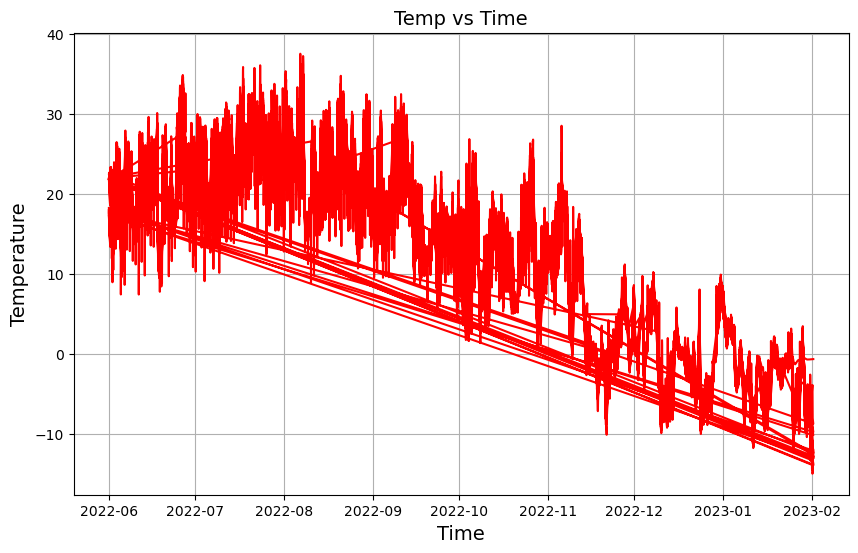

In [20]:
# plot temperature and time
plt.figure(figsize=(10,6))
plt.plot(Data['readable_time'], Data['temp'], color='red')
plt.title('Temp vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

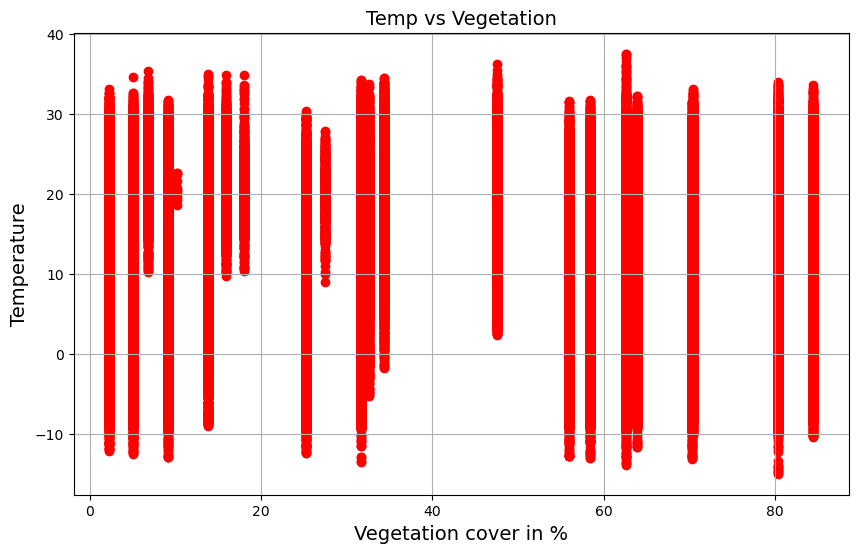

In [21]:
# plot temperature and vegatation cover percentage
plt.figure(figsize=(10,6))
plt.scatter(Data['lu_vege_pc'], Data['temp'], color='red')
plt.title('Temp vs Vegetation', fontsize=14)
plt.xlabel('Vegetation cover in %', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [22]:
Data=Data.drop(['readable_time'], axis=1)
Data

,temp,lu_vege_pc,unix_time
0,18.282500,5.11,1.654056e+09
1,17.802500,5.11,1.654060e+09
2,17.190000,5.11,1.654063e+09
3,16.790000,5.11,1.654067e+09
4,16.507500,5.11,1.654070e+09
...,...,...,...
91950,-0.613333,63.85,1.675249e+09
91951,-0.615000,63.85,1.675253e+09
91952,-0.620000,63.85,1.675256e+09
91953,-0.620000,63.85,1.675260e+09


In [23]:
# Construction of a correlation matrix to assess the linear relationships between the variables
Data.corr()

,temp,lu_vege_pc,unix_time
temp,1.000000,-0.075535,-0.843661
lu_vege_pc,-0.075535,1.000000,0.079689
unix_time,-0.843661,0.079689,1.000000


In [24]:
# independent variables - vegetation cover percentage and time
X = Data.drop(labels=['temp'], axis=1).values.reshape(-1,2) # from dataframe to numpy array for visualization at last

# dependent variable - time
Y = Data['temp']

In [25]:
# model initialization
regression_model = LinearRegression()

# fit the data(train the model)
regression_model.fit(X, Y)

# predict
y_predicted = regression_model.predict(X)

# model evaluation
rmse = mean_squared_error(Y, y_predicted, squared = False)
r2 = r2_score(Y, y_predicted)

In [26]:
# printing values
print('Slope: {0}\nIntercept: {1}\nRMSE: {2}\nR^2: {3}'.format(regression_model.coef_,regression_model.intercept_,rmse,r2))

Slope: [-3.18412718e-03 -1.47645797e-06]
Intercept: 2470.0199242812764
RMSE: 5.601452427090224
R^2: 0.7118330552936831


In [27]:
# visualization as 3D plot
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 100, 10)   # range of porosity values
y_pred = np.linspace(1654059600.0, 1675267200.0, 5)  # range of brittleness values
x_pred, y_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([x_pred.flatten(), y_pred.flatten()]).T


# predict
predicted = regression_model.predict(model_viz)

# model evaluation
#rmse = mp.mean_squared_error(Y, predicted)
r2 = regression_model.score(X, Y)

# printing r2
print('R^2: {0}'.format(r2))

R^2: 0.7118330552936831


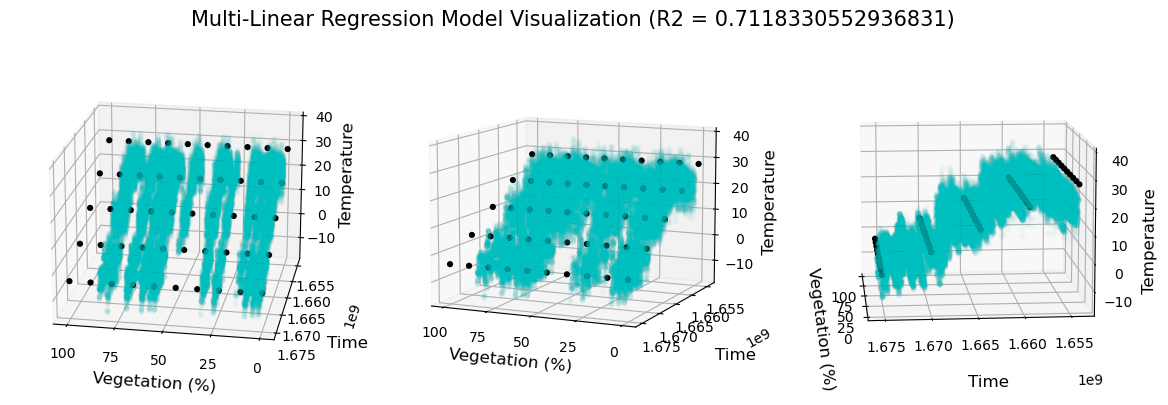

In [28]:
# plotting data
plt.style.use('default')
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    # to plot the dataset with vegetation%, time (independent) and temperature (dependent)
    ax.plot(x, y, z, color='c', zorder=20, linestyle='none', marker='.', alpha=0.025)
    # to plot predicted data
    ax.scatter(x_pred.flatten(), y_pred.flatten(), predicted, facecolor='k', s=20, edgecolor='None',alpha=1)
    # set label for axes
    ax.set_xlabel('Vegetation (%)', fontsize=12,labelpad = 5)
    ax.set_ylabel('Time', fontsize=12,labelpad = 15)
    ax.set_zlabel('Temperature', fontsize=12,labelpad = 5)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# changing view of the plots
ax1.view_init(elev=20, azim=100)
ax2.view_init(elev=10, azim=114)
ax3.view_init(elev=10, azim=175)

# title
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  
fig.tight_layout()


Findings: temperature rises until some time then drops, the prediction model did not capture that detail in next step